In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import corner

In [2]:
# plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['xtick.major.pad']=30
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.rcParams['font.size'] = 14

In [3]:
df = pd.read_csv('csv/acc-s15.484.csv')
df

,Pred_inc,Pred_PA,Real_inc,Real_PA
0,67.341934,103.452410,-77.2,113.035720
1,26.251130,37.163890,59.4,38.576390
2,-45.772480,-90.766040,-41.3,267.447880
3,62.852745,-54.623463,70.9,306.364650
4,25.396019,68.795990,30.3,71.096940
...,...,...,...,...
5395,11.434702,64.984566,11.1,66.252270
5396,-59.887413,-20.944437,-89.3,124.534190
5397,-66.849480,59.330902,-85.3,74.848460
5398,-63.141590,23.708084,-61.5,30.781431


In [4]:
df_cut = df[(df['Pred_inc'] < 67) * (df['Pred_inc'] > 63)].reset_index(drop=True)
df_cut

,Pred_inc,Pred_PA,Real_inc,Real_PA
0,63.468254,171.186020,77.2,161.353530
1,66.730804,161.643700,70.3,177.568310
2,63.211903,-189.805790,69.3,153.396320
3,64.931230,-51.474606,76.1,305.406560
4,64.223170,9.510390,76.1,17.937008
...,...,...,...,...
224,66.891300,-143.534700,76.6,202.772420
225,66.349014,101.082400,63.3,111.590164
226,65.706180,121.449974,69.1,130.376430
227,63.859340,116.811520,59.1,113.387830


In [5]:
real_inc = df_cut.Real_inc

<Axes: xlabel='Real_inc', ylabel='Density'>

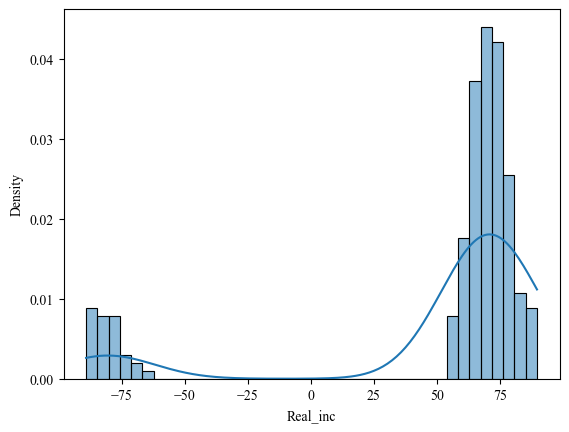

In [6]:
# sns.kdeplot(df_cut.Real_inc, fill=True)
sns.histplot(real_inc, kde=True, stat="density", bins=40)
# plt.show()

<Axes: xlabel='Real_PA', ylabel='Density'>

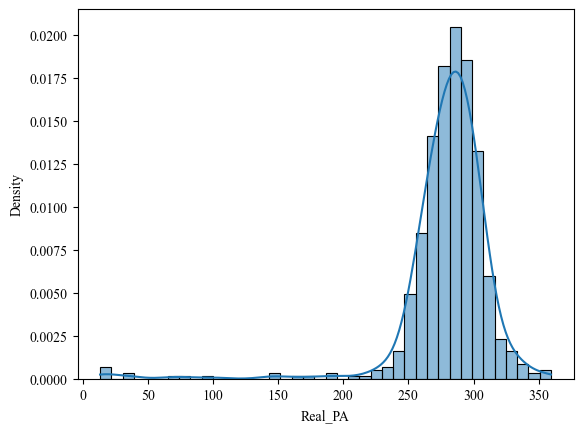

In [7]:
value =285
df_cut2 = df[np.minimum(np.abs(df.Pred_PA - value), np.abs(df.Pred_PA + 360 -value)) < 20]
sns.histplot(df_cut2.Real_PA, kde=True, stat="density", bins=40)


In [8]:
real_pa = df_cut2.Real_PA.values
real_pa = np.concatenate([real_pa - 360, real_pa, real_pa + 360])
real_pa = real_pa[(real_pa > 0) & (real_pa < 360)]

(0.0, 360.0)

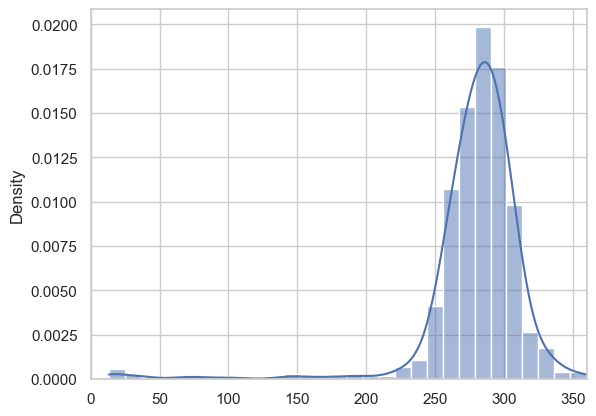

In [9]:
sns.set_theme(style="whitegrid")
sns.histplot(real_pa, kde=True, stat="density", bins=30)
plt.xlim(0, 360)

In [10]:
real_pa.shape

(654,)

In [11]:
value = 31
inc = 55.87
df_cut = df[(np.minimum(np.abs(df.Pred_PA - value), np.abs(df.Pred_PA + 360 -value)) < 40) & (df.Pred_inc < inc + 10) * (df.Pred_inc > inc - 10)]
df_cut.head()

,Pred_inc,Pred_PA,Real_inc,Real_PA
73,64.223170,9.510390,76.1,17.937008
84,59.807150,1.104742,56.6,355.718440
119,50.357480,-1.082430,49.7,344.534760
156,58.494930,33.166096,51.8,32.488968
192,56.736626,53.448055,60.6,27.189054


<Axes: xlabel='Real_inc', ylabel='Real_PA'>

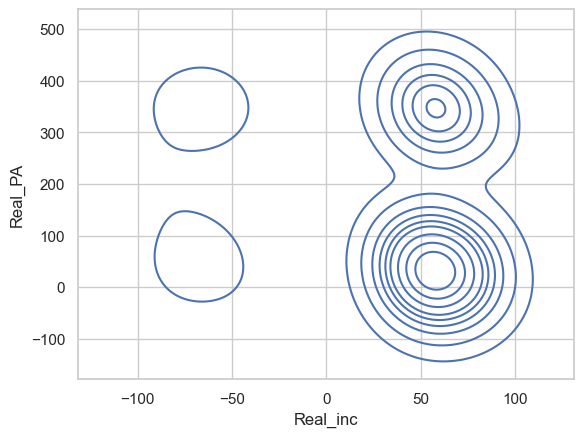

In [12]:
sns.kdeplot(df_cut, x="Real_inc", y="Real_PA", fill=False)

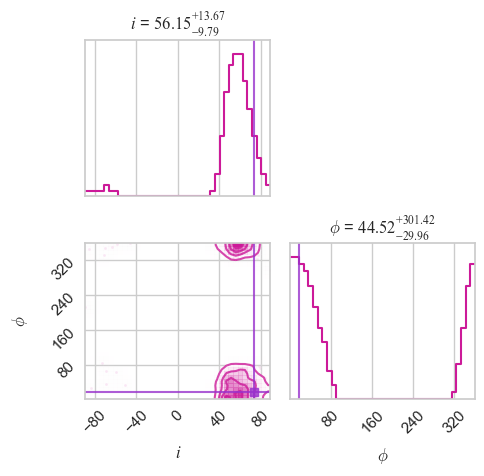

In [13]:
fig = plt.figure(figsize=(5, 5))
corner.corner(df_cut[['Real_inc','Real_PA']].values,
              labels=[r'$i$', r'$\phi$'], color=[0.8, 0.1, 0.6], 
            #   truths={'m1_source_frame_Msun': 36, 'm2_source_frame_Msun':29, 'redshift':0.09},
              truths=[73, 18], truth_color=[0.6, 0.2, 0.8, 0.8],
              bins=40, smooth=1, smooth1d=1, show_titles=True, title_kwargs={"fontsize": 12}, fig=fig, labelpad=0.00, label_kwargs={'font': 'Times New Roman', 'fontsize': 12},
              font='Times New Roman',
              # fontproperties=chinese_font
              );

# plt.set_xticklabels(rotation=0)
for ax in plt.gcf().get_axes():
  ax.tick_params(axis='both', which='major', pad=0)  

fig.tight_layout()
plt.savefig('images/kde.pdf', bbox_inches='tight')
plt.savefig('images/kde.png', dpi=600, bbox_inches='tight')